In [782]:
# Importing all the libraries in the previous files

import pandas as pd
from matplotlib import pyplot as plt # required for decomposition
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns
import numpy as np
import pymannkendall as mk
from statsmodels.stats.diagnostic import het_white
# SSL to overcome problem with ssl whn applying pd.read_csv()
import matplotlib.pyplot as plt

import datetime
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from statsmodels.tsa.seasonal import seasonal_decompose

from pylab import rcParams


rcParams['figure.figsize'] = 15, 12

plt.style.use('seaborn-v0_8')

# Stationarity Function and Methods
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller

# Evaluation and Error functions
# Evaluation

from math import sqrt
#figures
rcParams['figure.figsize'] = 15, 8
plt.style.use('seaborn-v0_8')
#warnings
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)


# Date function and holidays
from datetime import date
import holidays
#skimpy for descriptive analysis and using transformars
import skimpy as sk

In [783]:
# libraries for modelling and preprocessing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.utils.plotting import plot_series
from sktime.forecasting.base import ForecastingHorizon
from sktime.transformations.series.outlier_detection import HampelFilter
from sktime.forecasting.model_evaluation import evaluate
from sktime.transformations.series.difference import Differencer
from sklearn.neighbors import KNeighborsRegressor
from sktime.forecasting.compose import make_reduction
from sktime.forecasting.naive import NaiveForecaster
from sktime.performance_metrics.forecasting import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_log_error as msle
import xgboost as xgb
from xgboost import XGBRegressor 
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.forecasting.compose import (TransformedTargetForecaster)
from sktime.forecasting.model_selection import (ForecastingRandomizedSearchCV, ExpandingWindowSplitter, ForecastingGridSearchCV, SlidingWindowSplitter)
from sktime.transformations.series.boxcox import LogTransformer
from sktime.transformations.series.detrend import Deseasonalizer, Detrender
from sktime.forecasting.model_selection import SlidingWindowSplitter
from sktime.performance_metrics.forecasting import mean_absolute_error



In [784]:
# Stationarity test and heterosedasticity tests
import pymannkendall as mk
from statsmodels.stats.diagnostic import het_white
from statsmodels.tsa.stattools import kpss

# Box-cox for power transformation
from scipy.stats import boxcox 
from scipy.stats import yeojohnson # substitute of boxcox which accepts negative values as well
from sklearn.preprocessing import RobustScaler

In [785]:
# Autocorrelation plot
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [786]:
# Heterosedasticity
from collections import namedtuple
import statsmodels.api as sm

In [787]:
# Fourir Transform
from scipy.fft import fft, ifft
from scipy.signal import find_peaks

In [788]:
# Cross validation
from sklearn.model_selection import TimeSeriesSplit, cross_val_score

In [789]:
# For error matrics
from sklearn.metrics import mean_absolute_error, median_absolute_error, r2_score
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_percentage_error
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.linear_model import HuberRegressor
import numpy as np

In [790]:
# Stop overfitting
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import BaseCrossValidator

In [791]:
# Transformers
from sktime.transformations.series.detrend import Deseasonalizer
from sktime.transformations.series.detrend import Detrender
from sktime.transformations.series.boxcox import BoxCoxTransformer
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.forecasting.compose import make_reduction
from sktime.transformations.series.adapt import TabularToSeriesAdaptor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sktime.utils.plotting import plot_series
from sklearn.base import BaseEstimator, TransformerMixin
from sktime.transformations.base import _SeriesToSeriesTransformer
from sktime.transformations.base import _SeriesToPrimitivesTransformer
from sktime.transformations.base import _PanelToPanelTransformer
from sktime.transformations.series.detrend import Detrender
from sktime.transformations.series.outlier_detection import HampelFilter
from sktime.forecasting.compose import make_reduction
from sklearn.pipeline import Pipeline
from sktime.forecasting.compose import RecursiveTabularRegressionForecaster




In [792]:
# evaluate
from sktime.forecasting.model_evaluation import evaluate
from xgboost import plot_importance, plot_tree



In [793]:
# Read the CSV files
online_sales = pd.read_csv('online_sales.csv', parse_dates = ['invoiceDate'])
daily_profit_online_sales = pd.read_csv('daily_profit_online_sales.csv', parse_dates = ['invoiceDate'])


In [794]:
online_sales['invoiceDate'] = pd.to_datetime(online_sales['invoiceDate'] , format='%d/%m/%Y')

In [795]:
online_sales

,invoiceDate,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Abs_Quantity,Sales_Revenue
0,2022-12-01,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,6,15.30
1,2022-12-01,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,6,20.34
2,2022-12-01,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,8,22.00
3,2022-12-01,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,6,20.34
4,2022-12-01,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,6,20.34
...,...,...,...,...,...,...,...,...,...,...
536451,2023-12-09,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680,France,12,10.20
536452,2023-12-09,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680,France,6,12.60
536453,2023-12-09,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680,France,4,16.60
536454,2023-12-09,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,12680,France,4,16.60


In [796]:
daily_profit_online_sales

,invoiceDate,Sales_Revenue,week_day,month,is_holiday_uk,Season,transformed_Revenue,sqrt_transformed_Revenue,differenced_data
0,2022-12-01,58709.27,Thursday,December,0,Winter,1.292476,260.647194,NaN
1,2022-12-02,46021.82,Friday,December,0,Winter,0.818110,235.052143,-12687.45
2,2022-12-03,42847.67,Saturday,December,0,Winter,0.699433,228.200263,-3174.15
3,2022-12-04,0.00,Sunday,December,0,Winter,-0.902581,96.060866,-42847.67
4,2022-12-05,30982.01,Monday,December,0,Winter,0.255792,200.523565,30982.01
...,...,...,...,...,...,...,...,...,...
369,2023-12-05,56480.62,Tuesday,December,0,Winter,1.209150,256.336322,32052.44
370,2023-12-06,53535.94,Wednesday,December,0,Winter,1.099052,250.526705,-2944.68
371,2023-12-07,71500.46,Thursday,December,0,Winter,1.770720,284.126996,17964.52
372,2023-12-08,80704.29,Friday,December,0,Winter,2.114839,299.886612,9203.83


In [797]:
daily_profit_online_sales['invoiceDate'] = pd.to_datetime(daily_profit_online_sales['invoiceDate'] , format='%d/%m/%Y')

In [798]:
online_sales.set_index('invoiceDate',inplace=True)


In [799]:
online_sales

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Abs_Quantity,Sales_Revenue
invoiceDate,,,,,,,,,
2022-12-01,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,6,15.30
2022-12-01,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,6,20.34
2022-12-01,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,8,22.00
2022-12-01,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,6,20.34
2022-12-01,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,6,20.34
...,...,...,...,...,...,...,...,...,...
2023-12-09,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,12680,France,12,10.20
2023-12-09,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,12680,France,6,12.60
2023-12-09,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,12680,France,4,16.60


In [800]:
daily_profit_online_sales.set_index('invoiceDate',inplace=True)

In [801]:
daily_profit_online_sales

,Sales_Revenue,week_day,month,is_holiday_uk,Season,transformed_Revenue,sqrt_transformed_Revenue,differenced_data
invoiceDate,,,,,,,,
2022-12-01,58709.27,Thursday,December,0,Winter,1.292476,260.647194,NaN
2022-12-02,46021.82,Friday,December,0,Winter,0.818110,235.052143,-12687.45
2022-12-03,42847.67,Saturday,December,0,Winter,0.699433,228.200263,-3174.15
2022-12-04,0.00,Sunday,December,0,Winter,-0.902581,96.060866,-42847.67
2022-12-05,30982.01,Monday,December,0,Winter,0.255792,200.523565,30982.01
...,...,...,...,...,...,...,...,...
2023-12-05,56480.62,Tuesday,December,0,Winter,1.209150,256.336322,32052.44
2023-12-06,53535.94,Wednesday,December,0,Winter,1.099052,250.526705,-2944.68
2023-12-07,71500.46,Thursday,December,0,Winter,1.770720,284.126996,17964.52


For the first step,I am going to implement all three models using differentiated and original dataset, see how do they performa  using three models that can be used for non-stationary datasets:
1. Naive
2. KNN
3. xgboost
Evaluate and take the best

Then I am going to implement:
1. SARIMA model
2.Prophet model

Then I evaluate the winner of the first three and SARIMA and Prophet

### Train and test dataset


In [802]:
daily_profit_online_sales

,Sales_Revenue,week_day,month,is_holiday_uk,Season,transformed_Revenue,sqrt_transformed_Revenue,differenced_data
invoiceDate,,,,,,,,
2022-12-01,58709.27,Thursday,December,0,Winter,1.292476,260.647194,NaN
2022-12-02,46021.82,Friday,December,0,Winter,0.818110,235.052143,-12687.45
2022-12-03,42847.67,Saturday,December,0,Winter,0.699433,228.200263,-3174.15
2022-12-04,0.00,Sunday,December,0,Winter,-0.902581,96.060866,-42847.67
2022-12-05,30982.01,Monday,December,0,Winter,0.255792,200.523565,30982.01
...,...,...,...,...,...,...,...,...
2023-12-05,56480.62,Tuesday,December,0,Winter,1.209150,256.336322,32052.44
2023-12-06,53535.94,Wednesday,December,0,Winter,1.099052,250.526705,-2944.68
2023-12-07,71500.46,Thursday,December,0,Winter,1.770720,284.126996,17964.52


In [803]:
y = daily_profit_online_sales['Sales_Revenue']
y_train, y_test = temporal_train_test_split(y, test_size=0.3) 
test_ratio=len(y_test)/(len(y_train)+len(y_test))
print("Train set length:", len(y_train))
print("Test set length:", len(y_test))
print("Test/Train ratio is :",test_ratio)

Train set length: 261
Test set length: 113
Test/Train ratio is : 0.30213903743315507


In [804]:
display(y_train.shape, y_train.head(2), y_train.tail(2))
display(y_test.shape, y_test.head(2), y_test.tail(2))

(261,)

invoiceDate
2022-12-01    58709.27
2022-12-02    46021.82
Name: Sales_Revenue, dtype: float64

invoiceDate
2023-08-17    49195.14
2023-08-18    51674.05
Name: Sales_Revenue, dtype: float64

(113,)

invoiceDate
2023-08-19    17235.02
2023-08-20        0.00
Name: Sales_Revenue, dtype: float64

invoiceDate
2023-12-08    80704.29
2023-12-09    32111.91
Name: Sales_Revenue, dtype: float64

In [805]:
# Set frequency to 'D' (day)
y_train = y_train.asfreq('D')
y_test = y_test.asfreq('D')

Now we can see that we set the last 30% of our timeseries (113 entries) to as test set which spans from 19th of August to 9th of december


## Definition of Forecast Horizon
- for now we do the in sample forcast
- Using the first simplest model naive forcaster

**SKTime Workflow:**

1. Set the forecasting horizon.

    ○ Depends on the type of forecast (in or out sample)

2. Set the estimator

    ○ Several algorithms available
3. Set the transformers to carry out different pre-processing operations

    ○ Depends on the characteristics of the time series

    ○ Several types of transformers to capture the patterns in the time series

4. Define the hyper parameters

5. Fit the model and evaluate through cross validation

I am going to do the following as I also would like to practice the stuff I learned:
1. Get the simple in sample prediction with models on original revenue, and add seasonality to it and see the perfromance
2. then apply the same as above to the differenced data and get the reverse transform of the prediction
3. choose the best model
4.final model error matrics to evaluate at the end 
5.y_pred_naive_original_revenue_seasonal

I am going to apply the above to all of my modelings:

1. Simplest naive
2. KNN
3. XGBoost
when I evaluated these three I do hypertuning for the winner
----- 
4. SARIMA EXTRA
----
5. Prophet EXTRA
---
6. Combine SARIMA +Booster
evaluate the best of the first batch, SARIMA, Prophet and choose the best one
then do the hyper tuning for the best one 

In [806]:
# In-Sample Forecasting horizon

fh = ForecastingHorizon(y_test.index, is_relative=False)
fh 

ForecastingHorizon(['2023-08-19', '2023-08-20', '2023-08-21', '2023-08-22',
               '2023-08-23', '2023-08-24', '2023-08-25', '2023-08-26',
               '2023-08-27', '2023-08-28',
               ...
               '2023-11-30', '2023-12-01', '2023-12-02', '2023-12-03',
               '2023-12-04', '2023-12-05', '2023-12-06', '2023-12-07',
               '2023-12-08', '2023-12-09'],
              dtype='datetime64[ns]', name='invoiceDate', length=113, freq='D', is_relative=False)

The forcasting horizon is equal to our test index. We want to train the naive model on the sales revenue values spans from 2022-12-01 till 2023-08-18 and see how it forcasts the values on our test data from 2023-08-19 till 2023-12-09. The values are absolute and not relative so we put is_relative to False.

## Fitting the predictions

In [807]:
forecaster = NaiveForecaster(strategy="last") 
forecaster.fit(y_train)
y_pred_naive_original_revenue_basic = forecaster.predict(fh)

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Sales_Revenue'>)

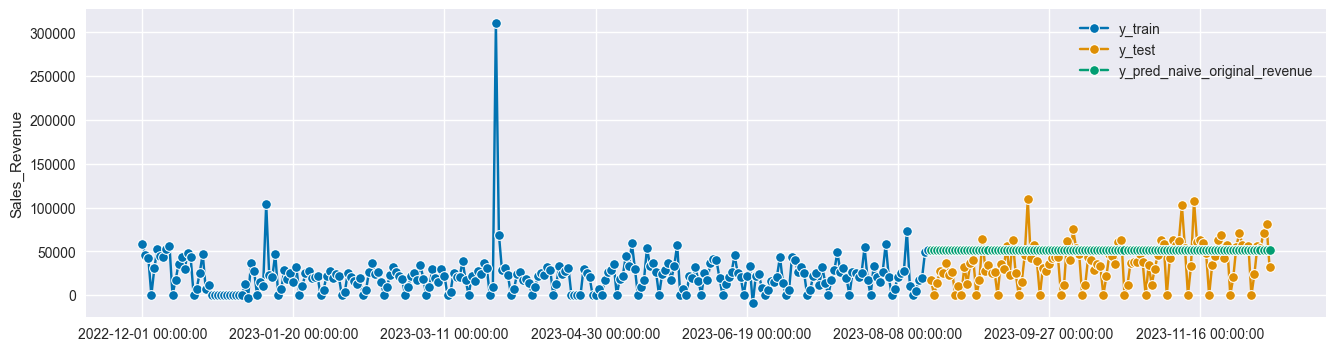

In [808]:
plot_series(y_train, y_test, y_pred_naive_original_revenue_basic, labels=["y_train", "y_test", "y_pred_naive_original_revenue"])

 It is a line for the last prediction which is not informative. Now, I am going to add the seasonality that we detected as weekly for the original revenue

In [809]:
forecaster_naive = NaiveForecaster(strategy="last", sp=7)
forecaster_naive.fit(y_train)
y_pred_naive_original_revenue_seasonal = forecaster_naive.predict(fh)

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Sales_Revenue'>)

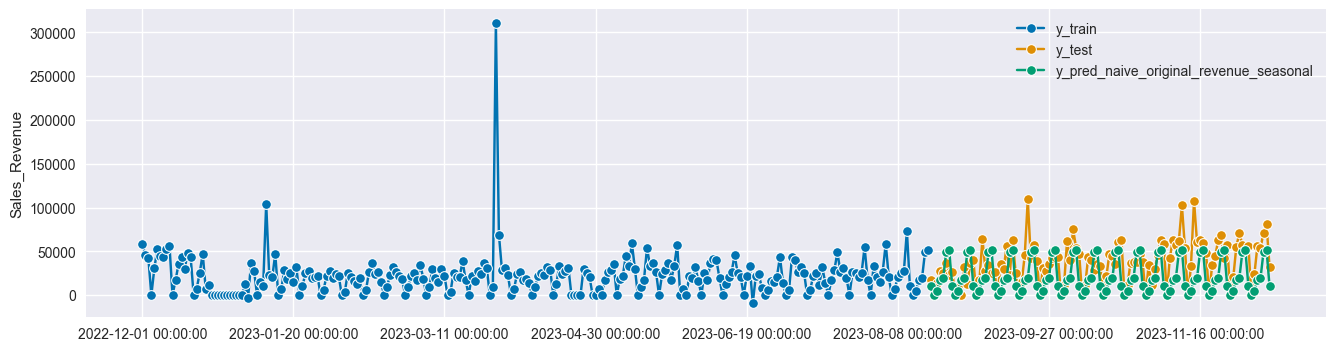

In [810]:
plot_series(y_train, y_test, y_pred_naive_original_revenue_seasonal, labels=["y_train", "y_test", "y_pred_naive_original_revenue_seasonal"])

In [811]:
forecaster = NaiveForecaster(strategy="last", sp=14)
forecaster.fit(y_train)
y_pred_naive_original_revenue_seasonal_biweekly = forecaster.predict(fh)

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Sales_Revenue'>)

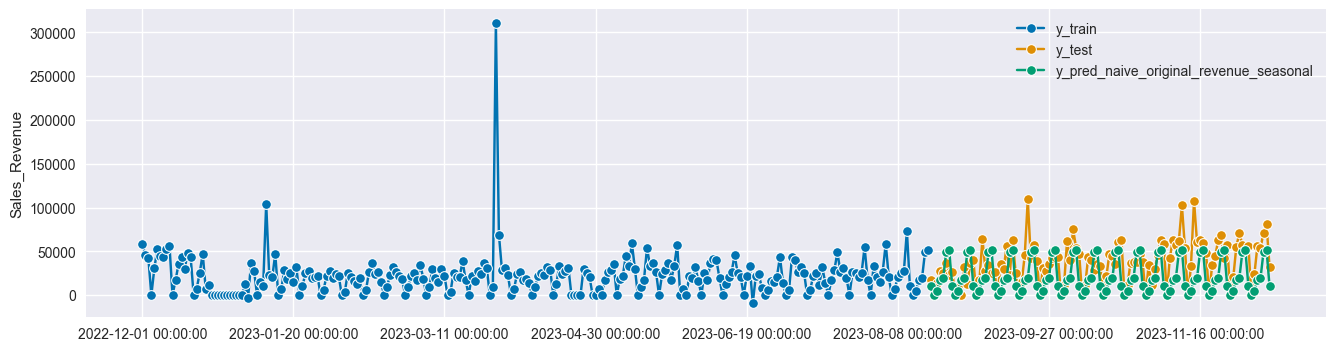

In [812]:
plot_series(y_train, y_test, y_pred_naive_original_revenue_seasonal, labels=["y_train", "y_test", "y_pred_naive_original_revenue_seasonal"])

We can see when we implemented the seasonality of 7 days the error reduced significantly. let's compare it with bi-weekly seasonality that we saw before.

Let's evaluate based on the error matrics as we have outliers, i am going to use the best matrics for outliers:

1.Mean Absolute Error (MAE): MAE is less sensitive to outliers compared to Mean Squared Error (MSE) because it takes the absolute difference between the predicted and actual values. However, it does not penalize large errors as much as MSE.

2.Median Absolute Error (MedAE): Similar to MAE, but instead of taking the mean of the absolute errors, it takes the median. It is also less sensitive to outliers compared to MSE.

3. **R^2 Score**: Also known as the coefficient of determination, R^2 score measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, with higher values indicating better model performance.

4 .**Scaled Error Metrics**: You can also consider scaling your error metrics based on the range of your data or using other scaling techniques to reduce the impact of outliers.

In [813]:
mape = MeanAbsolutePercentageError(symmetric=False)
# Calculate error metrics for the basic naive model
mae_basic = mean_absolute_error(y_test, y_pred_naive_original_revenue_basic)
medae_basic = median_absolute_error(y_test, y_pred_naive_original_revenue_basic)
mse_basic = mean_squared_error(y_test, y_pred_naive_original_revenue_basic)
msle_basic = mean_squared_log_error(y_test, y_pred_naive_original_revenue_basic)
mape_basic=mape(y_test, y_pred_naive_original_revenue_basic)
display(mae_basic,medae_basic,mse_basic,msle_basic)

# Calculate error metrics for the seasonal naive model for weekly
mae_seasonal = mean_absolute_error(y_test, y_pred_naive_original_revenue_seasonal)
medae_seasonal = median_absolute_error(y_test, y_pred_naive_original_revenue_seasonal)
mse_seasonal = mean_squared_error(y_test, y_pred_naive_original_revenue_seasonal)
msle_seasonal = mean_squared_log_error(y_test, y_pred_naive_original_revenue_seasonal)
mape_seasonal= mape(y_test,y_pred_naive_original_revenue_seasonal)

# Calculate error metrics for the seasonal naive model for biweekly
mae_seasonal_biweekly = mean_absolute_error(y_test, y_pred_naive_original_revenue_seasonal_biweekly)
medae_seasonal_biweekly = median_absolute_error(y_test, y_pred_naive_original_revenue_seasonal_biweekly)
mse_seasonal_biweekly = mean_squared_error(y_test, y_pred_naive_original_revenue_seasonal_biweekly)
msle_seasonal_biweekly = mean_squared_log_error(y_test, y_pred_naive_original_revenue_seasonal_biweekly)
mape_seasonal_biweekly= mape(y_test,y_pred_naive_original_revenue_seasonal_biweekly)


# Create a DataFrame with the error metrics
error_metrics = pd.DataFrame({
    'Model': ['Naive Basic', 'Naive Seasonal Weekly','Naive Seasonal BiWeekly'],
    'Mean Absolute Error': [mae_basic, mae_seasonal,mae_seasonal_biweekly],
    'Mean Absolute Percentage Error': [mape_basic,mape_seasonal,mape_seasonal_biweekly],
    'Median Absolute Error': [medae_basic, medae_seasonal,medae_seasonal_biweekly],
    'Mean Squared Error': [mse_basic, mse_seasonal,mse_seasonal_biweekly],
    'Mean Squared Log Error': [msle_basic, msle_seasonal,msle_seasonal_biweekly],

})

error_metrics

22793.754318584073

17363.84999999999

798631811.0892632

18.0080288979899

,Model,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Mean Squared Error,Mean Squared Log Error
0,Naive Basic,22793.754319,3.501086e+19,17363.85,7.986318e+08,18.008029
1,Naive Seasonal Weekly,20197.763204,6.856631e+17,16228.94,7.114304e+08,1.767949
2,Naive Seasonal BiWeekly,20212.623646,6.856631e+17,16814.93,7.025963e+08,1.589282


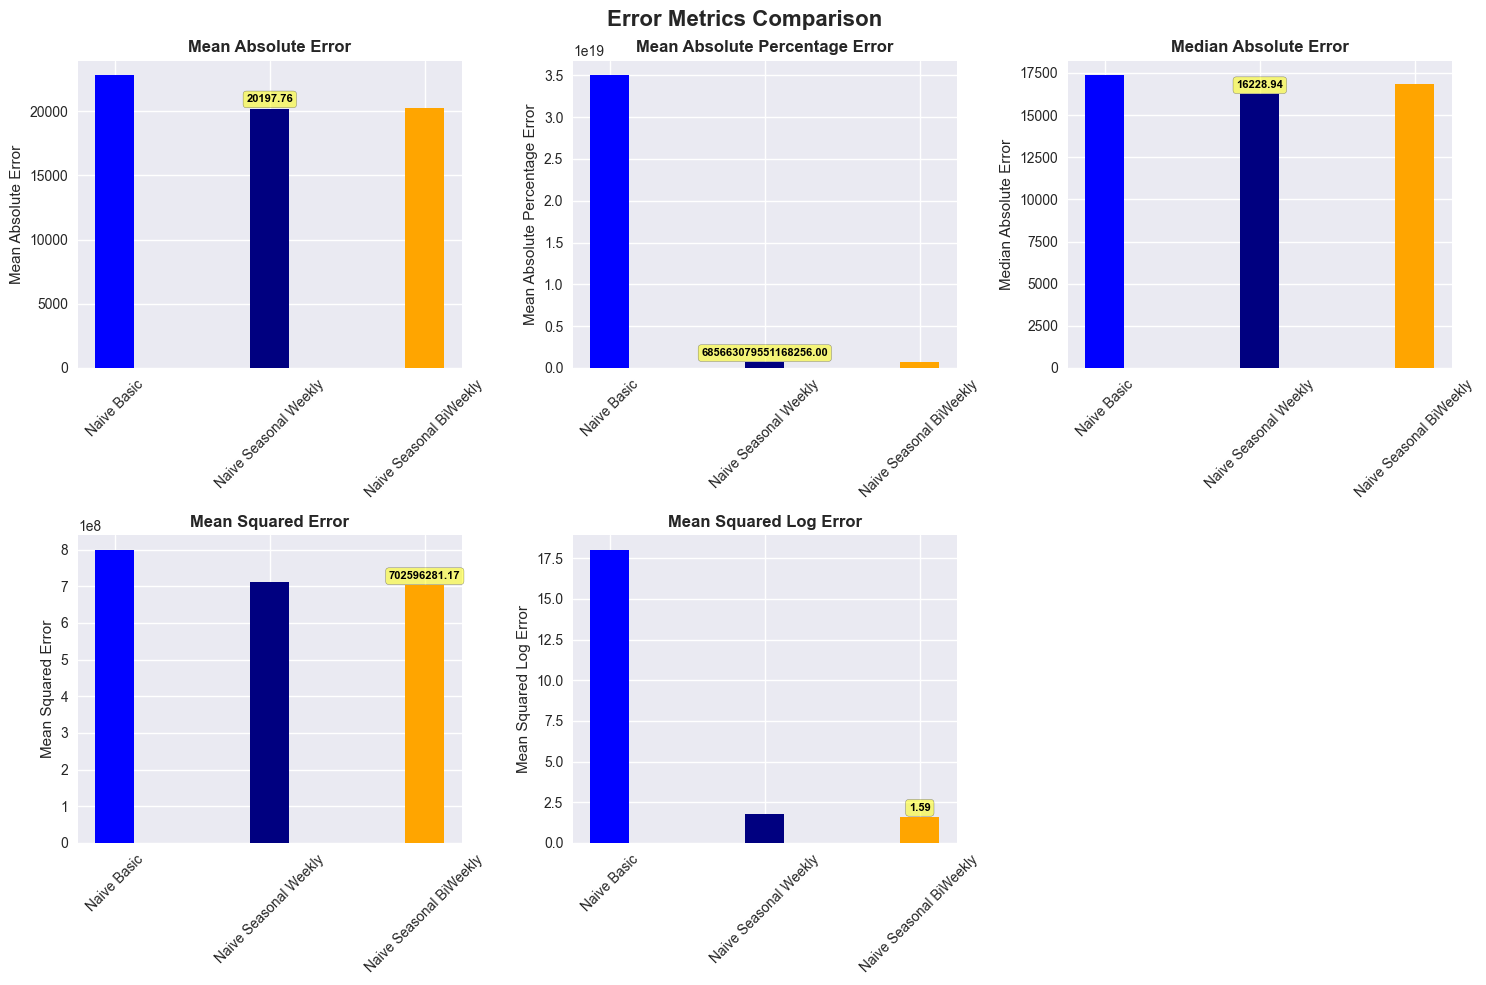

In [814]:
# Data for the error metrics
models = error_metrics['Model']
metrics = ['Mean Absolute Error', 'Mean Absolute Percentage Error', 'Median Absolute Error', 'Mean Squared Error', 'Mean Squared Log Error']
values = error_metrics[metrics].values
colors = ['blue', 'navy', 'orange','green']
# Set up the figure and axis
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Set bar width
barWidth = 0.25

# Create subplots for each error metric
for i, metric in enumerate(metrics):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    for j, model in enumerate(models):
        color = 'blue' if j == 0 else 'navy' if j == 1 else 'orange' if j == 2 else 'green'
        ax.bar(j, values[j][i], color=color, label=model, width=barWidth)
        ax.set_title(models[j])

    ax.set_ylabel(metric)
    ax.set_xticks(range(len(models)))
    ax.set_xticklabels(models, rotation=45)
    ax.set_title(metric, fontsize=12, fontweight='bold')  # Set the title to the error metric column name
    # Annotate the bar with the smallest error value
    min_idx = error_metrics[metric].idxmin()
    ax.annotate(f'{error_metrics[metric][min_idx]:.2f}',
                xy=(min_idx, error_metrics[metric][min_idx]),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom',
                fontsize=8, fontweight='bold',
                color='black',
                bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.5))
    

# Remove the subplot in row 2, column 3
fig.delaxes(axs[1, 2])
# Set the suptitle for the entire figure
plt.suptitle('Error Metrics Comparison', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()


I tagged the best one with minimum error in each chart
It looks like we are dealing with a trade-off between different error metrics for our weekly and biweekly naive models. Here are a few considerations:

Mean Squared Error (MSE) and Mean Squared Log Error (MSLE): Lower values are better for both metrics, indicating a closer fit of the model's predictions to the actual values. In this case, the biweekly model has a slightly lower MSE and MSLE, suggesting it might be performing slightly better in terms of overall fit.

Mean Absolute Error (MAE) and Median Absolute Error (MedAE): Similarly, lower values are better for both metrics, indicating a closer fit of the model's predictions to the actual values. Here, the weekly model has lower MAE and MedAE, suggesting it might be performing better in terms of the magnitude of errors.
As I am more concerned about minimizing the effect of outliers I would choose the seasonal weekly naive model as it has the least absolute error and median absolute error.


We can see the percentage mean absolute error is only 15% for the differenced. Let me revert back the values of prediction to what represents the predicted values of revenue in test dataframe and the real performance

**Naive Seasonal Weekly**:
Mean and Median Absolute Errors: The model performs reasonably well, with a mean absolute error of 20197, which is the least among the models.

**Naive Seasonal Biweekly Model**:

Mean Absolute Percentage Error: 

Mean Squared Error and Mean Squared Logarithmic Error: This model has the least errors in these metrics, indicating better performance in terms of accuracy.
Overall Performance: It performs well in terms of error metrics, suggesting it captures some seasonal patterns.



**Flaws of Naive Models**: 

Naive models, including seasonal differencing, have limitations in capturing the complexity of non-stationary and seasonal data, leading to suboptimal performance.

**Potential of KNN and XGBoost**:

KNN and XGBoost are more sophisticated models that can potentially offer better performance by capturing more intricate patterns in the data.



Here is the context of what the next two algorithms do and what are their characteristics and use cases:

**K-Nearest Neighbors (KNN)**:
    **Description**: KNN is a simple, instance-based learning algorithm used for classification and regression. It works by finding the K closest training examples in the feature space and predicting the output based on the majority class (for classification) or the average (for regression) of these neighbors.
    **Characteristics**:
        1. Non-parametric: KNN doesn't make any assumptions about the underlying data distribution.
        2. Lazy Learning: It doesn't explicitly build a model during training but instead stores the training instances and makes predictions based on them during testing.
        3. Interpretability: KNN is easy to understand and interpret, making it suitable for beginners and for cases where interpretability is important. In our case, I am a beginner and for interpretability of this assignement and as I want to start from the simplest I am going to implement KNN.
        4. Hyperparameter: The choice of K (number of neighbors) is a crucial hyperparameter that can significantly impact the model's performance.


**XGBoost (Extreme Gradient Boosting)**:
    **Description**: XGBoost is a powerful, efficient implementation of the gradient boosting algorithm. It builds a series of decision trees sequentially, each tree correcting errors made by the previous ones. It uses gradient descent optimization techniques to minimize the loss function.
    **Characteristics**:

        1. Ensemble Learning: XGBoost combines the predictions from multiple decision trees to improve performance and generalization.

        2. Regularization: It includes L1 and L2 regularization terms in the objective function to control model complexity and prevent overfitting.

        3. Feature Importance: XGBoost provides a feature importance score, indicating the contribution of each feature to the model's predictions.

        4. Handling Missing Values: XGBoost has built-in capabilities to handle missing values in the dataset, reducing the need for preprocessing.

**Comparison**:
    **Complexity**: XGBoost is more complex and computationally intensive compared to KNN, which can be simpler and more straightforward.
    **Performance**: XGBoost often outperforms KNN in terms of predictive accuracy, especially in datasets with complex relationships.
    **Interpretability**: KNN is more interpretable than XGBoost, as it directly uses the training instances for predictions, making it easier to understand the reasoning behind predictions.
    **Suitability**: KNN is suitable for smaller datasets with fewer features, while XGBoost is more suitable for larger datasets with complex relationships.


Based on the above information and the characteriscs of the online sales revenue, which is non-stationary with increasing trend and number of features and underlying complexity of seasonality  XGBoost expects to perform better as it is more versatile and can handle a wider range of data types and complexities, it may be a better choice if we tune its hyperparameters effectively.
Let's see:



In [815]:
daily_profit_online_sales.shape

(374, 8)

### KNN 

Now let's see what KNN is and what are the characteristics of the KNN: it is a simple instance based lazy learning  which forcasts the revenues based on the k-nearest neighbours. The parameters that we can take into account to use gridsearch to optimize are:
k: The number of neighbors to consider. This is a hyperparameter that needs to be specified before training the model. A smaller value of k means that noise will have a higher influence on the result, while a larger value make it computationally expensive.
Other parameters include:

Distance metric: The distance metric used to calculate the distance between data points. Common choices include Euclidean distance, Manhattan distance, and Minkowski distance.

Weights: The weight function used in prediction. Options include uniform weights, where all neighbors have equal weight, and distance weights, where closer neighbors have more influence.

Algorithm: The algorithm used to compute the nearest neighbors. Options include brute force, kd_tree, and ball_tree. Brute force is simple but can be slow for large datasets, while the other options use tree structures to speed up the search.

Leaf size: The number of points at which the algorithm switches to brute-force search. This parameter is used when the algorithm is set to use kd_tree or ball_tree.

P: The power parameter for the Minkowski distance metric. When p=1, this is equivalent to using Manhattan distance, and when p=2, it is equivalent to using Euclidean distance.


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Sales_Revenue'>)

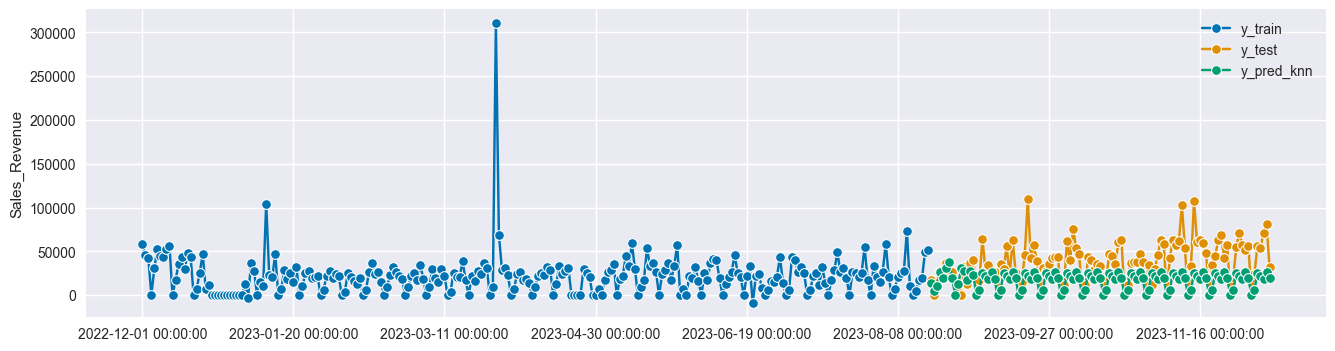

In [816]:
regressor = KNeighborsRegressor(n_neighbors=4)
forecaster = make_reduction(regressor, strategy="recursive", window_length=7)
forecaster.fit(y_train.dropna(), fh=fh)
y_pred_knn_basic = forecaster.predict()
plot_series(y_train, y_test, y_pred_knn_basic, labels=["y_train", "y_test", "y_pred_knn"])

In [817]:
mae_knn_basic= mean_absolute_error(y_test, y_pred_knn_basic)
medae_knn_basic= median_absolute_error(y_test, y_pred_knn_basic)
mse_knn_basic= mean_squared_error(y_test, y_pred_knn_basic)
mape_knn_basic=mape(y_test, y_pred_knn_basic)
msle_knn_basic=msle(y_test, y_pred_knn_basic)
# Create a new row for XGBoost errors

error_metrics.loc[2] = ['KNN_Basic',mae_knn_basic,mape_knn_basic, medae_knn_basic, mse_knn_basic, msle_knn_basic]


# Sort the DataFrame by Model column
error_metrics = error_metrics.sort_values(by='Model').reset_index(drop=True)

# Display the updated DataFrame
display(error_metrics)

,Model,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Mean Squared Error,Mean Squared Log Error
0,KNN_Basic,20901.145279,1.423252e+18,17786.4825,7.596429e+08,2.282012
1,Naive Basic,22793.754319,3.501086e+19,17363.8500,7.986318e+08,18.008029
2,Naive Seasonal Weekly,20197.763204,6.856631e+17,16228.9400,7.114304e+08,1.767949


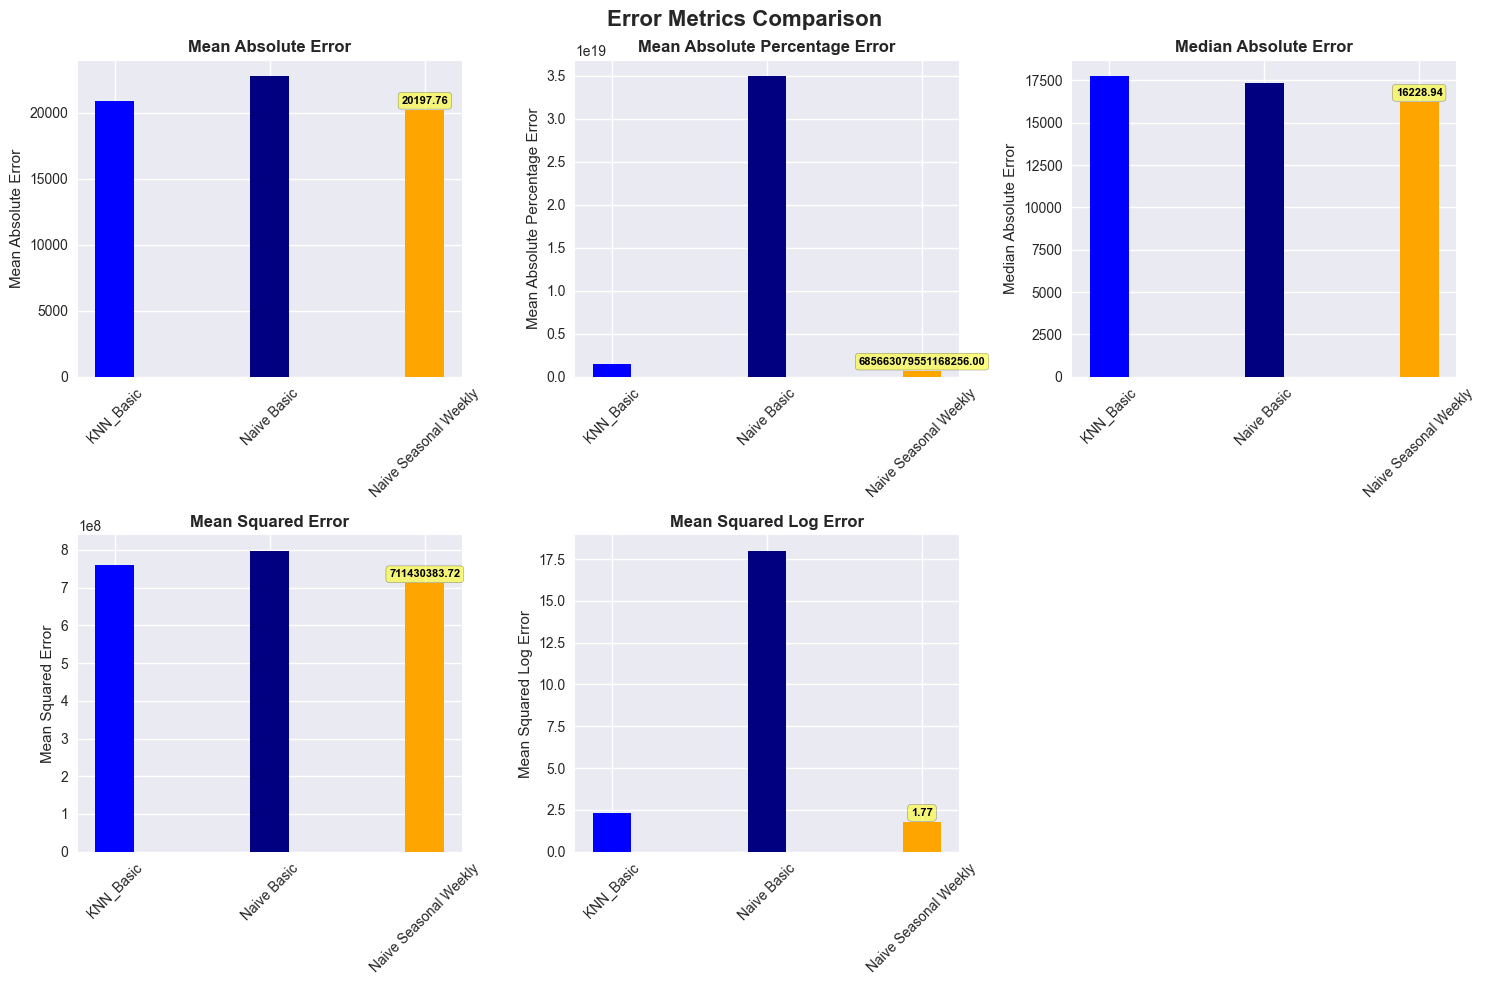

In [818]:

# Data for the error metrics
models = error_metrics['Model']
metrics = ['Mean Absolute Error', 'Mean Absolute Percentage Error', 'Median Absolute Error', 'Mean Squared Error', 'Mean Squared Log Error']
values = error_metrics[metrics].values
colors = ['blue', 'navy', 'orange','green']
# Set up the figure and axis
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Set bar width
barWidth = 0.25

# Create subplots for each error metric
for i, metric in enumerate(metrics):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    for j, model in enumerate(models):
        color = 'blue' if j == 0 else 'navy' if j == 1 else 'orange' if j == 2 else 'green'
        ax.bar(j, values[j][i], color=color, label=model, width=barWidth)
        ax.set_title(models[j])

    ax.set_ylabel(metric)
    ax.set_xticks(range(len(models)))
    ax.set_xticklabels(models, rotation=45)
    ax.set_title(metric, fontsize=12, fontweight='bold')  # Set the title to the error metric column name
    # Annotate the bar with the smallest error value
    min_idx = error_metrics[metric].idxmin()
    ax.annotate(f'{error_metrics[metric][min_idx]:.2f}',
                xy=(min_idx, error_metrics[metric][min_idx]),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom',
                fontsize=8, fontweight='bold',
                color='black',
                bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.5))
    

# Remove the subplot in row 2, column 3
fig.delaxes(axs[1, 2])
# Set the suptitle for the entire figure
plt.suptitle('Error Metrics Comparison', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

We can see that KNN basic is doing worse than the other two. In thsi case of online sales dataset as the data is small as the model becomes complex it needs careful setting of the hyperparameters to avoid overfitting and make real and knowledgable prediction. In this case for sure seasonal trends and seasonality have great effect on the result as we saw in the first part with the simplest naiveforecaster.We should determine on the performance of all of the models after train them on the whole dataset not just date and profit.so for now I am going to do grid search for the best hyperparameters of the KNN basic and then compare the results with the other two models.

In [819]:
# Reduce the complexity of the model to avoid overfitting as the model is not performing well for small number of dataset
# Define the parameter grid

# Parameter grid
param_grid = {'n_neighbors': [3, 5, 7, 9,14],
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

# Initialize XGBoost model

regressor = KNeighborsRegressor(n_neighbors=4)
# Create a placeholder array for X (since we're using only y_train)
n_samples = len(y_train)
X_dummy = np.zeros((n_samples, 1))  # Assuming one feature

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1)
grid_search.fit(X=X_dummy, y=y_train)

# Get the best hyperparameters
best_params_knn = grid_search.best_params_
print("Best Hyperparameters:", best_params_knn)

# Create a new instance of the XGBRegressor with the best hyperparameters

best_model = KNeighborsRegressor(**best_params_knn)
# Train the final model on the entire training dataset
best_model.fit(X=X_dummy, y=y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}


KNeighborsRegressor(metric='euclidean')

In [820]:
best_params_knn

{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}

 This is is the best parameters for KNN to perform the best on neg_mean_absolute_error.
 let's get the new tuned KNN model :

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Sales_Revenue'>)

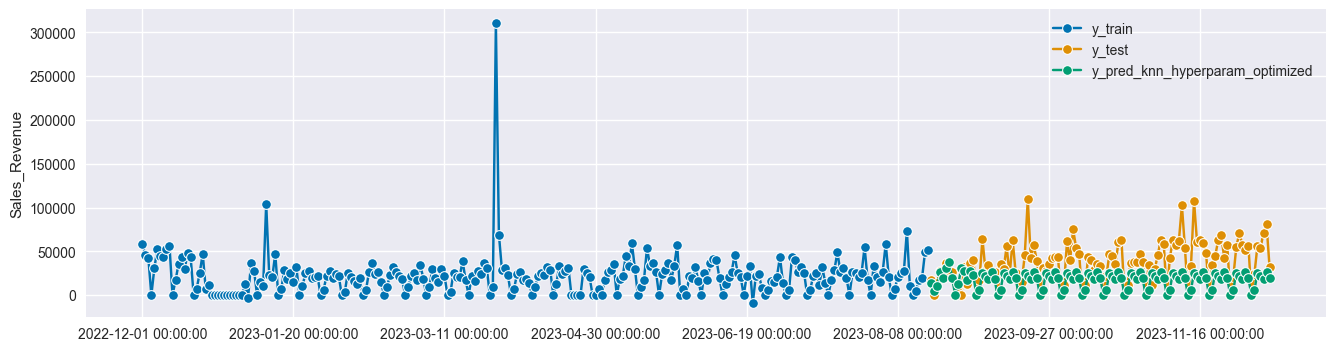

In [821]:
regressor_hyper_opt = KNeighborsRegressor(n_neighbors=best_params_knn['n_neighbors'], 
                          weights=best_params_knn['weights'],
                          metric=best_params_knn['metric']
                          )
forecaster_knn_opt = make_reduction(regressor_hyper_opt, strategy="recursive", window_length=7)
forecaster_knn_opt.fit(y_train.dropna(), fh=fh)
y_pred_knn_hyperparam_optimized = forecaster_knn_opt.predict()
plot_series(y_train, y_test, y_pred_knn_basic, labels=["y_train", "y_test", "y_pred_knn_hyperparam_optimized"])

In [822]:
mae_knn_optimized= mean_absolute_error(y_test, y_pred_knn_hyperparam_optimized )
medae_knn_optimized= median_absolute_error(y_test,y_pred_knn_hyperparam_optimized )
mse_knn_optimized= mean_squared_error(y_test, y_pred_knn_hyperparam_optimized )
mape_knn_optimized=mape(y_test,y_pred_knn_hyperparam_optimized )
msle_knn_optimized=msle(y_test, y_pred_knn_hyperparam_optimized )
# Create a new row for XGBoost errors

error_metrics.loc[3] = ['KNN_hyperparam_opt',mae_knn_optimized,mape_knn_optimized, medae_knn_optimized, mse_knn_optimized, msle_knn_optimized]


# Sort the DataFrame by Model column
error_metrics = error_metrics.sort_values(by='Model').reset_index(drop=True)

# Display the updated DataFrame
display(error_metrics)

,Model,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Mean Squared Error,Mean Squared Log Error
0,KNN_Basic,20901.145279,1.423252e+18,17786.4825,7.596429e+08,2.282012
1,KNN_hyperparam_opt,20777.348037,1.360357e+18,17880.5780,7.553257e+08,2.215544
2,Naive Basic,22793.754319,3.501086e+19,17363.8500,7.986318e+08,18.008029
3,Naive Seasonal Weekly,20197.763204,6.856631e+17,16228.9400,7.114304e+08,1.767949


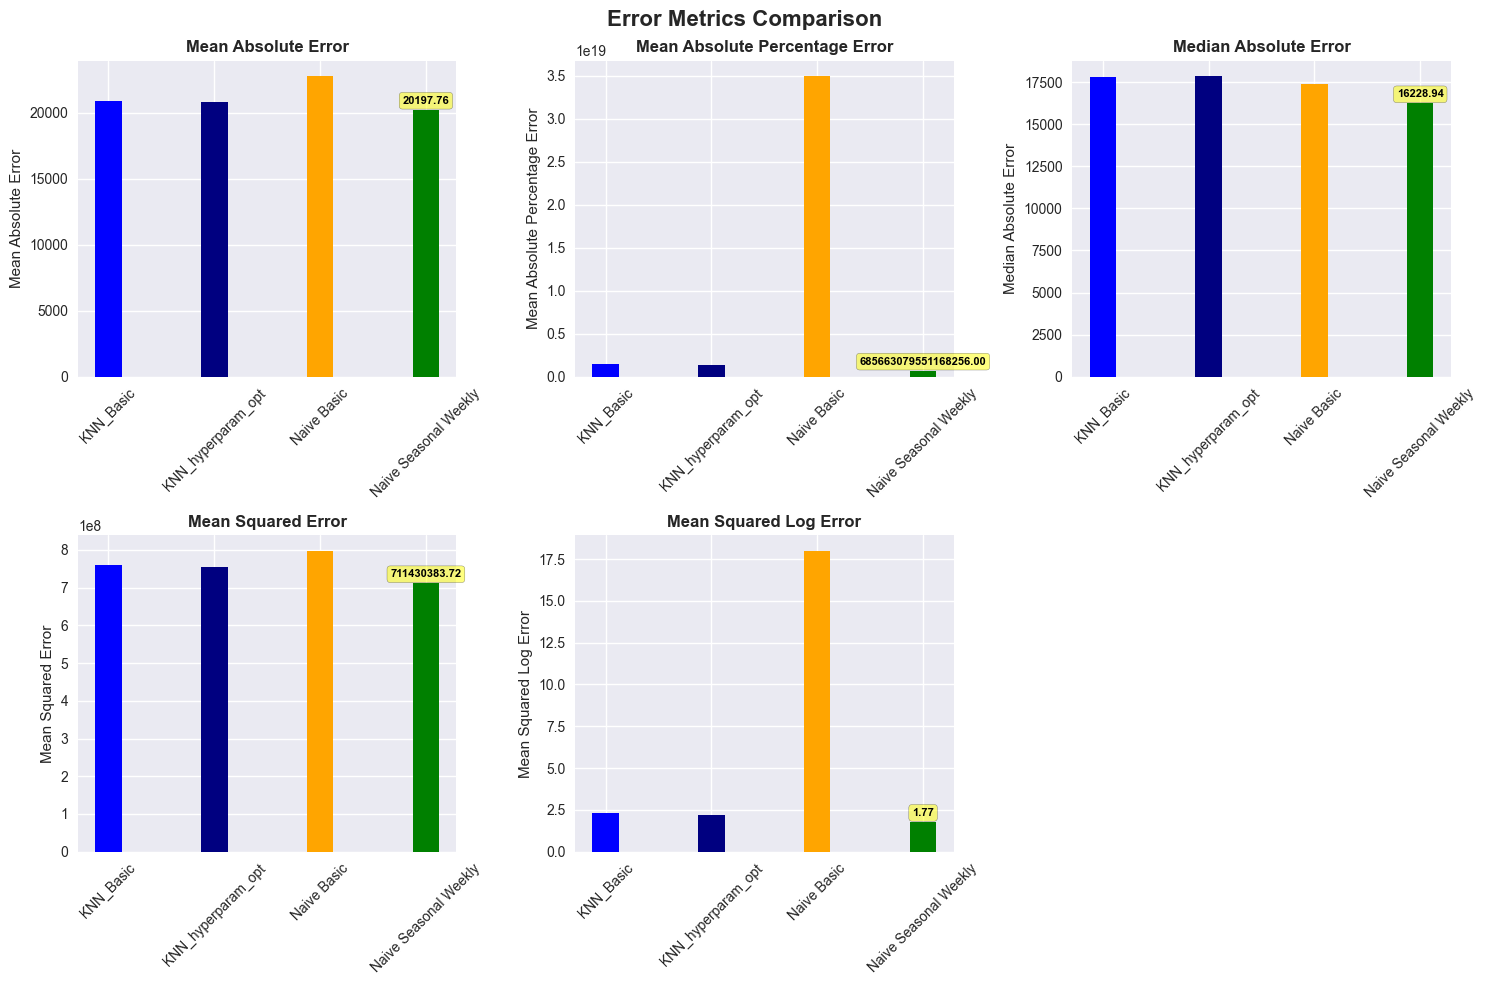

In [823]:
# Data for the error metrics
models = error_metrics['Model']
metrics = ['Mean Absolute Error', 'Mean Absolute Percentage Error', 'Median Absolute Error', 'Mean Squared Error', 'Mean Squared Log Error']
values = error_metrics[metrics].values
colors = ['blue', 'navy', 'orange','green']
# Set up the figure and axis
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Set bar width
barWidth = 0.25

# Create subplots for each error metric
for i, metric in enumerate(metrics):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    for j, model in enumerate(models):
        color = 'blue' if j == 0 else 'navy' if j == 1 else 'orange' if j == 2 else 'green'
        ax.bar(j, values[j][i], color=color, label=model, width=barWidth)
        ax.set_title(models[j])

    ax.set_ylabel(metric)
    ax.set_xticks(range(len(models)))
    ax.set_xticklabels(models, rotation=45)
    ax.set_title(metric, fontsize=12, fontweight='bold')  # Set the title to the error metric column name
    # Annotate the bar with the smallest error value
    min_idx = error_metrics[metric].idxmin()
    ax.annotate(f'{error_metrics[metric][min_idx]:.2f}',
                xy=(min_idx, error_metrics[metric][min_idx]),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom',
                fontsize=8, fontweight='bold',
                color='black',
                bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.5))
    

# Remove the subplot in row 2, column 3
fig.delaxes(axs[1, 2])
# Set the suptitle for the entire figure
plt.suptitle('Error Metrics Comparison', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

I am going to keep the KNN_hyperparameter optimized model as it performs better in every matrics except the median absolute error and remove the basic one. So let's remove KNN_basic model in error matrics

In [824]:
rows_to_drop = error_metrics[error_metrics['Model']=='KNN_Basic']
error_metrics.drop(rows_to_drop.index, axis=0, inplace=True)


In [825]:
error_metrics

,Model,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Mean Squared Error,Mean Squared Log Error
1,KNN_hyperparam_opt,20777.348037,1.360357e+18,17880.578,7.553257e+08,2.215544
2,Naive Basic,22793.754319,3.501086e+19,17363.850,7.986318e+08,18.008029
3,Naive Seasonal Weekly,20197.763204,6.856631e+17,16228.940,7.114304e+08,1.767949


### XGBoost

24352.978053901068

19900.396484375

886449109.2275789

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Sales_Revenue'>)

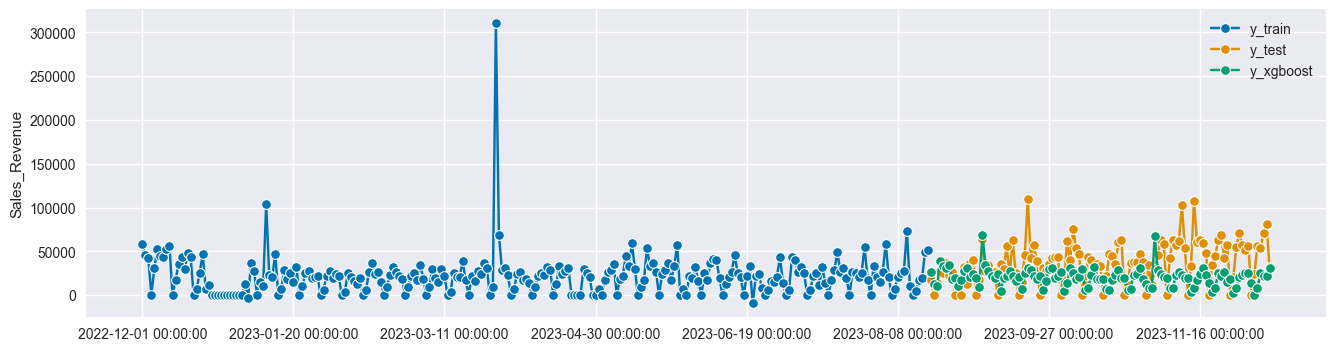

In [826]:

# Create forecaster 
xgb_regressor = XGBRegressor(objective='reg:squarederror', random_state=42)
forecaster_xgb = make_reduction(xgb_regressor, strategy="recursive")
forecaster_xgb.fit(y_train)
y_pred_xgboost = forecaster_xgb.predict(fh)
# Plot
# error for the test
mae_xgboost= mean_absolute_error(y_test, y_pred_xgboost)
medae_xgboost= median_absolute_error(y_test, y_pred_xgboost)
mse_xgboost= mean_squared_error(y_test, y_pred_xgboost)
mape_xgboost=mape(y_test, y_pred_xgboost)
msle_xgboost=msle(y_test, y_pred_xgboost)
display(mae_xgboost,medae_xgboost,mse_xgboost)
plot_series(y_train, y_test, y_pred_xgboost, labels=["y_train", "y_test","y_xgboost"])

In [827]:

# Create a new row for XGBoost errors

error_metrics.loc[2] = ['XGBOOST_OBJ_IS_SQRER',mae_xgboost, mape_xgboost, medae_xgboost, mse_xgboost, msle_xgboost]


# Sort the DataFrame by Model column
error_metrics = error_metrics.reset_index(drop=True)

# Display the updated DataFrame
display(error_metrics)




,Model,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Mean Squared Error,Mean Squared Log Error
0,KNN_hyperparam_opt,20777.348037,1.360357e+18,17880.578000,7.553257e+08,2.215544
1,XGBOOST_OBJ_IS_SQRER,24352.978054,1.313468e+19,19900.396484,8.864491e+08,15.634662
2,Naive Seasonal Weekly,20197.763204,6.856631e+17,16228.940000,7.114304e+08,1.767949


It looks like XGBoost model is performing better on the training dataset compared to the test dataset, which suggests that it might be overfitting. The high values of Mean Absolute Percentage Error and Mean Squared Error on the test dataset indicate that the model's predictions are far from the actual values.

It seems that xgboost is now the worst performer. There can be several reasons that we are going to check each of these:
- Model Complexity causes overfitting: XGBoost is a more complex model compared to the naive seasonal models. It's possible that the complexity of XGBoost is not necessary for your dataset and is causing overfitting, especially if the dataset is small.

- Hyperparameters: The default hyperparameters of XGBoost might not be optimal for the online sales dataset. We need to tune the hyperparameters, such as the learning rate, maximum depth of trees, and regularization parameters, to improve performance.

- Feature Engineering: XGBoost might not be able to effectively learn from the features in the dataset. It could be beneficial to perform more extensive feature engineering to provide better input to the model.

- Data Quality: The quality of thedata, including missing values, outliers, and noise, can significantly impact the performance of machine learning models. As I decided to keep the outliers those might have impacts.

- Model Selection: XGBoost might not be the best model for your specific dataset. It's always a good idea to try different models and compare their performance to find the best one for the problem.

In [828]:
y_test

2023-08-19    17235.02
2023-08-20        0.00
2023-08-21    14392.62
2023-08-22    27972.49
2023-08-23    25741.21
                ...   
2023-12-05    56480.62
2023-12-06    53535.94
2023-12-07    71500.46
2023-12-08    80704.29
2023-12-09    32111.91
Freq: D, Name: Sales_Revenue, Length: 113, dtype: float64

In [829]:
y_train

2022-12-01    58709.27
2022-12-02    46021.82
2022-12-03    42847.67
2022-12-04        0.00
2022-12-05    30982.01
                ...   
2023-08-14     5133.48
2023-08-15    17204.00
2023-08-16    19223.47
2023-08-17    49195.14
2023-08-18    51674.05
Freq: D, Name: Sales_Revenue, Length: 261, dtype: float64

 I tried the following code to see the prediction on train dataset but as the tabular regression forecaster does not support the insample forecasting I am going to implement it while the model is running above
**Get the result on train set**
y_train_pred = forecaster_xgb.predict(fh=y_train.index)

**Calculate error metrics for training set**
mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
medae_train = median_absolute_error(y_train, y_train_pred)
msle_train = mean_squared_log_error(y_train, y_train_pred)

I want to reduce complexity of the model and initiate and generate my xgbooster model and compare the resultswith the previous one, and choose the best model before going to KNN model.

In [830]:
# Reduce the complexity of the model to avoid overfitting as the model is not performing well for small number of dataset
# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 5, 10],
    'gamma': [0, 0.1, 1],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0, 0.01, 0.1]
}

# Initialize XGBoost model
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Create a placeholder array for X (since we're using only y_train)
n_samples = len(y_train)
X_dummy = np.zeros((n_samples, 1))  # Assuming one feature

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error', verbose=1)
grid_search.fit(X=X_dummy, y=y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Create a new instance of the XGBRegressor with the best hyperparameters
best_model = xgb.XGBRegressor(objective='reg:squarederror', **best_params)

# Train the final model on the entire training dataset
best_model.fit(X=X_dummy, y=y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Hyperparameters: {'gamma': 0, 'max_depth': 3, 'min_child_weight': 1, 'reg_alpha': 0, 'reg_lambda': 0}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

As I am going through different models to assess the model with best parameters that the grid search found.
Best Hyperparameters: {'gamma': 0, 'max_depth': 3, 'min_child_weight': 1, 'reg_alpha': 0, 'reg_lambda': 0}

In [831]:
xgb_regressor = XGBRegressor(objective='reg:squarederror', random_state=42) 
forecaster_xgb = make_reduction(xgb_regressor, strategy="recursive")
# Set parameters using set_params method
xgb_regressor.set_params(max_depth=3, min_child_weight=1, gamma=0, reg_alpha=0, reg_lambda=0)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Sales_Revenue'>)

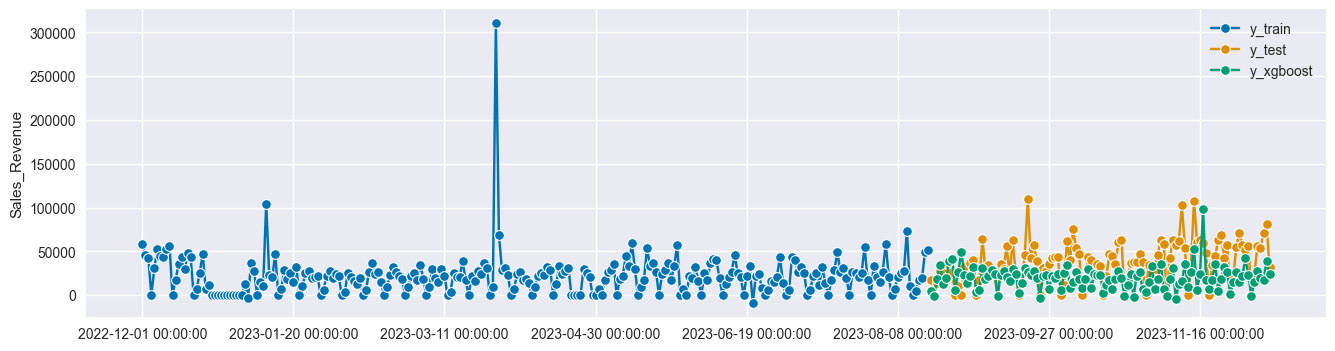

In [832]:

forecaster_xgb.fit(y_train)
y_pred_xgboost_hyperpar_opt = forecaster_xgb.predict(fh)
plot_series(y_train, y_test, y_pred_xgboost_hyperpar_opt, labels=["y_train", "y_test","y_xgboost"])

In [833]:
display(error_metrics)

,Model,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Mean Squared Error,Mean Squared Log Error
0,KNN_hyperparam_opt,20777.348037,1.360357e+18,17880.578000,7.553257e+08,2.215544
1,XGBOOST_OBJ_IS_SQRER,24352.978054,1.313468e+19,19900.396484,8.864491e+08,15.634662
2,Naive Seasonal Weekly,20197.763204,6.856631e+17,16228.940000,7.114304e+08,1.767949


In [834]:
# error for the test
mae_xgboost_best_param= mean_absolute_error(y_test,y_pred_xgboost_hyperpar_opt)
medae_xgboost_best_param= median_absolute_error(y_test,y_pred_xgboost_hyperpar_opt)
mse_xgboost_best_param= mean_squared_error(y_test, y_pred_xgboost)
mape_xgboost_best_param=mape(y_test, y_pred_xgboost_hyperpar_opt)
display(mae_xgboost_best_param,medae_xgboost_best_param,mse_xgboost_best_param)

# Create a new row for XGBoost errors

error_metrics.loc[3] = ['XGBOOST_hyprparam_optimized',mae_xgboost_best_param, mape_xgboost_best_param, medae_xgboost_best_param, mse_xgboost_best_param, np.nan]


# Sort the DataFrame by Model column
error_metrics = error_metrics.sort_values(by='Model').reset_index(drop=True)

# Display the updated error matrics
display(error_metrics)


21476.380909914275

16215.32421875

886449109.2275789

,Model,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Mean Squared Error,Mean Squared Log Error
0,KNN_hyperparam_opt,20777.348037,1.360357e+18,17880.578000,7.553257e+08,2.215544
1,Naive Seasonal Weekly,20197.763204,6.856631e+17,16228.940000,7.114304e+08,1.767949
2,XGBOOST_OBJ_IS_SQRER,24352.978054,1.313468e+19,19900.396484,8.864491e+08,15.634662
3,XGBOOST_hyprparam_optimized,21476.380910,4.230814e+18,16215.324219,8.864491e+08,NaN


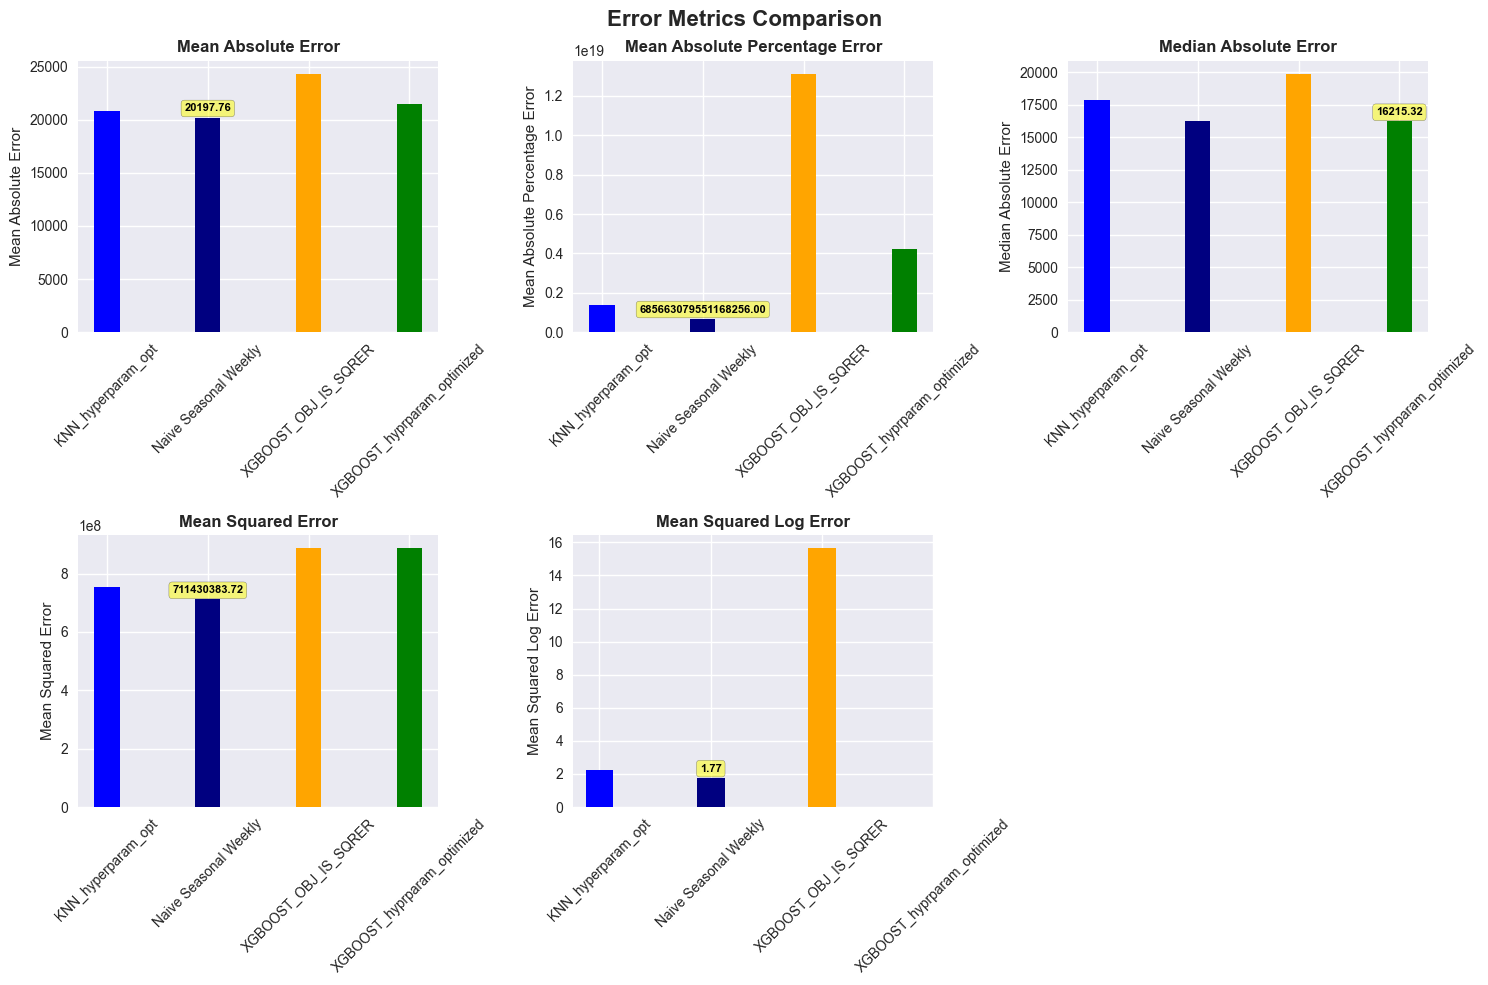

In [835]:
# Data for the error metrics
models = error_metrics['Model']
metrics = ['Mean Absolute Error', 'Mean Absolute Percentage Error', 'Median Absolute Error', 'Mean Squared Error', 'Mean Squared Log Error']
values = error_metrics[metrics].values
colors = ['blue', 'navy', 'orange','green']
# Set up the figure and axis
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Set bar width
barWidth = 0.25

# Create subplots for each error metric
for i, metric in enumerate(metrics):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    for j, model in enumerate(models):
        color = 'blue' if j == 0 else 'navy' if j == 1 else 'orange' if j == 2 else 'green'
        ax.bar(j, values[j][i], color=color, label=model, width=barWidth)
        ax.set_title(models[j])

    ax.set_ylabel(metric)
    ax.set_xticks(range(len(models)))
    ax.set_xticklabels(models, rotation=45)
    ax.set_title(metric, fontsize=12, fontweight='bold')  # Set the title to the error metric column name
    # Annotate the bar with the smallest error value
    min_idx = error_metrics[metric].idxmin()
    ax.annotate(f'{error_metrics[metric][min_idx]:.2f}',
                xy=(min_idx, error_metrics[metric][min_idx]),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom',
                fontsize=8, fontweight='bold',
                color='black',
                bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.5))
    

# Remove the subplot in row 2, column 3
fig.delaxes(axs[1, 2])
# Set the suptitle for the entire figure
plt.suptitle('Error Metrics Comparison', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()

We can see that the mean absolute error in the test with new paramaters improved and reduced from 24352.97 to 21476.38 but the train error remains the same. In the overall matrics of all the models still the naive seasonal is the best in terms of mean absolute error, but GXBoost optimized verion is the the best in terms of median absolute error(which is a good measurement for this model as it has outliers and the low median absolute error is a good measurement). Overall the xgboost may have more complexity and maynot not appropriate for this type of data.
We should check for overfitting after the transformation: I alreayd have transformed other data so it can help the model not to memorize and overfit, i will evaluate all of the models after transformation so we can see how they are effected bu getting more information.
I am going to remove the xgboost basic without hyperparameter tuning to have the best of our three models.

In [836]:
rows_to_drop = error_metrics[error_metrics['Model']=='XGBOOST_OBJ_IS_SQRER']
error_metrics.drop(rows_to_drop.index, axis=0, inplace=True)

In [837]:
# Display the updated error matrics

error_metrics.reset_index(inplace=True, drop=True)
display(error_metrics)

,Model,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Mean Squared Error,Mean Squared Log Error
0,KNN_hyperparam_opt,20777.348037,1.360357e+18,17880.578000,7.553257e+08,2.215544
1,Naive Seasonal Weekly,20197.763204,6.856631e+17,16228.940000,7.114304e+08,1.767949
2,XGBOOST_hyprparam_optimized,21476.380910,4.230814e+18,16215.324219,8.864491e+08,NaN


overall performance till now and analysis:

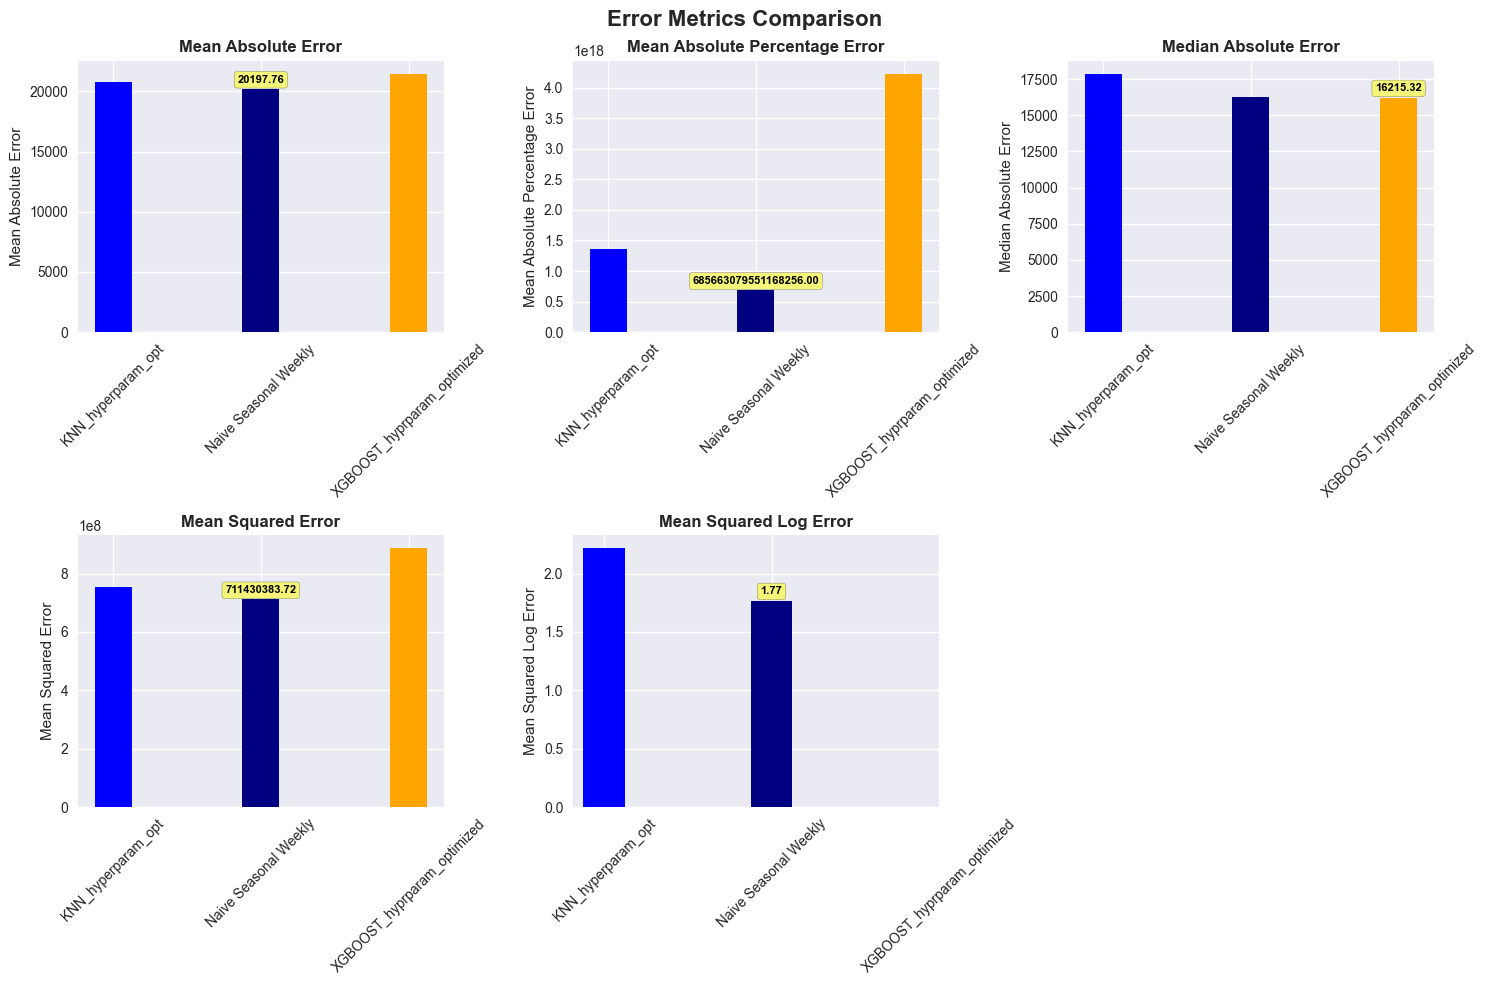

In [838]:
# Data for the error metrics
models = error_metrics['Model']
metrics = ['Mean Absolute Error', 'Mean Absolute Percentage Error', 'Median Absolute Error', 'Mean Squared Error', 'Mean Squared Log Error']
values = error_metrics[metrics].values
colors = ['blue', 'navy', 'orange','green']
# Set up the figure and axis
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Set bar width
barWidth = 0.25

# Create subplots for each error metric
for i, metric in enumerate(metrics):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    for j, model in enumerate(models):
        color = 'blue' if j == 0 else 'navy' if j == 1 else 'orange' if j == 2 else 'green'
        ax.bar(j, values[j][i], color=color, label=model, width=barWidth)
        ax.set_title(models[j])

    ax.set_ylabel(metric)
    ax.set_xticks(range(len(models)))
    ax.set_xticklabels(models, rotation=45)
    ax.set_title(metric, fontsize=12, fontweight='bold')  # Set the title to the error metric column name
    # Annotate the bar with the smallest error value
    min_idx = error_metrics[metric].idxmin()
    ax.annotate(f'{error_metrics[metric][min_idx]:.2f}',
                xy=(min_idx, error_metrics[metric][min_idx]),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom',
                fontsize=8, fontweight='bold',
                color='black',
                bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.5))
    

# Remove the subplot in row 2, column 3
fig.delaxes(axs[1, 2])
# Set the suptitle for the entire figure
plt.suptitle('Error Metrics Comparison', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

We can see that Naive weekly seasonal weekly is the best model among others then KNN anf then xboost_hyperparam_optimized. In my opinion this is just the beginning. I didn't take into account other time features that i extracted before to make it simple and start from a simple model and approach it evolutionary. It doesn't mean that naive model is the best model it is the simplest model and the only model that we directly introduced seasonality in. Then KNN with a bit more complexity than naive model performs better to with 5 neighbours which can be consider as seasonality (for each day it averaging the previous 5 days to predict each day's revenue) using euclidian metrics. we haven't introduced the seasonality to gxbooster and it doesn't perform well on small size dataset. we should do a lot of tuning , making sure it is not overfitted. Now let  apply appropriate transformers to our xgbooster and see how it will improve:

In [839]:

# Define the forecasting horizon and validation size

    
fh = ForecastingHorizon(y_test.index, is_relative=False)
validation_size = len(y_test)

step_length = 1  # Set step length to 1 for consecutive windows
window_length = len(y_train) - validation_size # Adjust window_length and fh to be compatible with the length of the time series
cv = SlidingWindowSplitter(window_length=window_length,
                           step_length=step_length, fh=validation_size)

regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Define the pipeline with transformations and regressor
forecaster = TransformedTargetForecaster(steps=[
    ("deseasonalize_week", Deseasonalizer(model="additive", sp=5)),
    ("deseasonalize_month", Deseasonalizer(model="additive", sp=30)),
    ("deseasonalize_biweekly", Deseasonalizer(model="additive", sp=15)),
    ('HampelFilter', HampelFilter(window_length=30)), 
    ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=3))),
    ("forecast", make_reduction(regressor, window_length=30, scitype='tabular-regressor'))
])


# Hyperparameter tuning
param_grid = {
    'estimator__max_depth': [2, 3, 5, 6, 10, 15, 20,30],
    'estimator__learning_rate': [0.01,0.05, 0.1, 0.2,0.25, 0.3],
    'estimator__subsample': np.arange(0.5, 1.0, 0.1),
    'estimator__colsample_bytree': np.arange(0.4, 1.0, 0.1),
    'estimator__colsample_bylevel': np.arange(0.4, 1.0, 0.1),
    'estimator__n_estimators': [50,100,200,300, 500, 1000]
}

model= make_reduction(regressor, window_length=30,  scitype='tabular-regressor')
# Print the params dictionary before the line causing the error

# Addressing the deprecated parameters:
gscv = ForecastingRandomizedSearchCV(
    model,
    cv=cv,
    param_distributions=param_grid,
    n_iter=100,
    random_state=42,
    error_score='raise',
    backend_params={
        'n_jobs': -1, 
        'pre_dispatch': '2*n_jobs'
    } # Provide n_jobs within backend_params
)

# Fit the model on the training data
gscv.fit(y_train)

# Make predictions on the forecasting horizon
y_pred_cv_xgb = gscv.predict(fh)


c:\Users\donna\anaconda3\envs\TimeSeriesCourse\Lib\site-packages\sktime\forecasting\model_selection\_tune.py:201: UserWarning: in ForecastingRandomizedSearchCV, n_jobs and pre_dispatch parameters are deprecated and will be removed in 0.27.0. Please use n_jobs and pre_dispatch directly in the backend_params argument instead.
  warn(


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='Sales_Revenue'>)

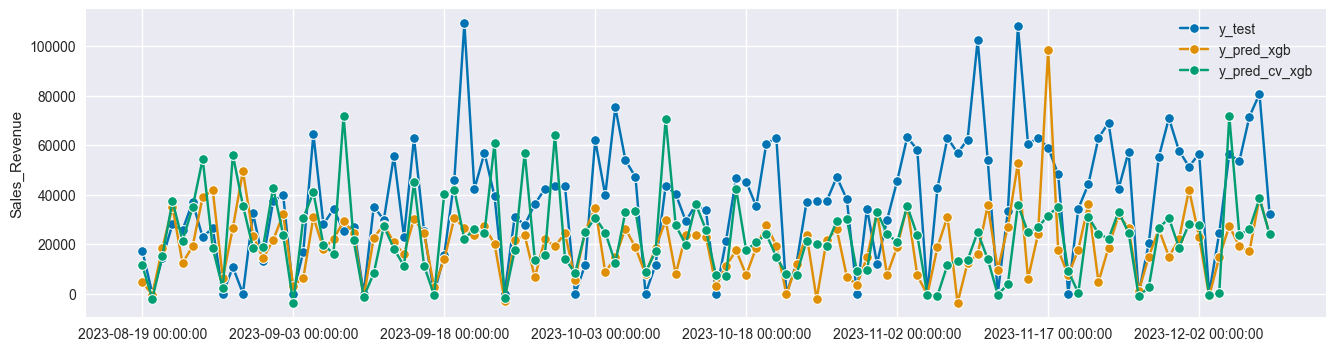

In [840]:
plot_series(y_test, y_pred_xgboost_hyperpar_opt, y_pred_cv_xgb, labels=["y_test", "y_pred_xgb", "y_pred_cv_xgb"])

In [841]:
error_metrics

,Model,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Mean Squared Error,Mean Squared Log Error
0,KNN_hyperparam_opt,20777.348037,1.360357e+18,17880.578000,7.553257e+08,2.215544
1,Naive Seasonal Weekly,20197.763204,6.856631e+17,16228.940000,7.114304e+08,1.767949
2,XGBOOST_hyprparam_optimized,21476.380910,4.230814e+18,16215.324219,8.864491e+08,NaN


from the plot it is obvious that the error for the xgboost model with super_hyper_parameter optimized and seasonality with transformer is more accurate. Let's get the error matrics and evlauate.

In [842]:
# error for the test
mae_xgboost_transformer= mean_absolute_error(y_test, y_pred_cv_xgb)
medae_xgboost_transformer= median_absolute_error(y_test, y_pred_cv_xgb)
mse_xgboost_transformer= mean_squared_error(y_test,  y_pred_cv_xgb)
mape_xgboost_transformer=mape(y_test,  y_pred_cv_xgb)
display(mae_xgboost_transformer,medae_xgboost_transformer,mse_xgboost_transformer)

# Create a new row for XGBoost errors

error_metrics.loc[3] = ['XGBOOST_transformer',mae_xgboost_transformer,mape_xgboost_transformer,medae_xgboost_transformer, mse_xgboost_transformer, np.nan]


# Sort the DataFrame by Model column
error_metrics = error_metrics.sort_values(by='Model').reset_index(drop=True)

# Display the updated error matrics
display(error_metrics)

21466.973769023523

17657.056396484375

756703903.5999098

,Model,Mean Absolute Error,Mean Absolute Percentage Error,Median Absolute Error,Mean Squared Error,Mean Squared Log Error
0,KNN_hyperparam_opt,20777.348037,1.360357e+18,17880.578000,7.553257e+08,2.215544
1,Naive Seasonal Weekly,20197.763204,6.856631e+17,16228.940000,7.114304e+08,1.767949
2,XGBOOST_hyprparam_optimized,21476.380910,4.230814e+18,16215.324219,8.864491e+08,NaN
3,XGBOOST_transformer,21466.973769,4.008439e+18,17657.056396,7.567039e+08,NaN


We can see that the xboost with transformer and hyper optimization of seasonal, weekly and  increased the 

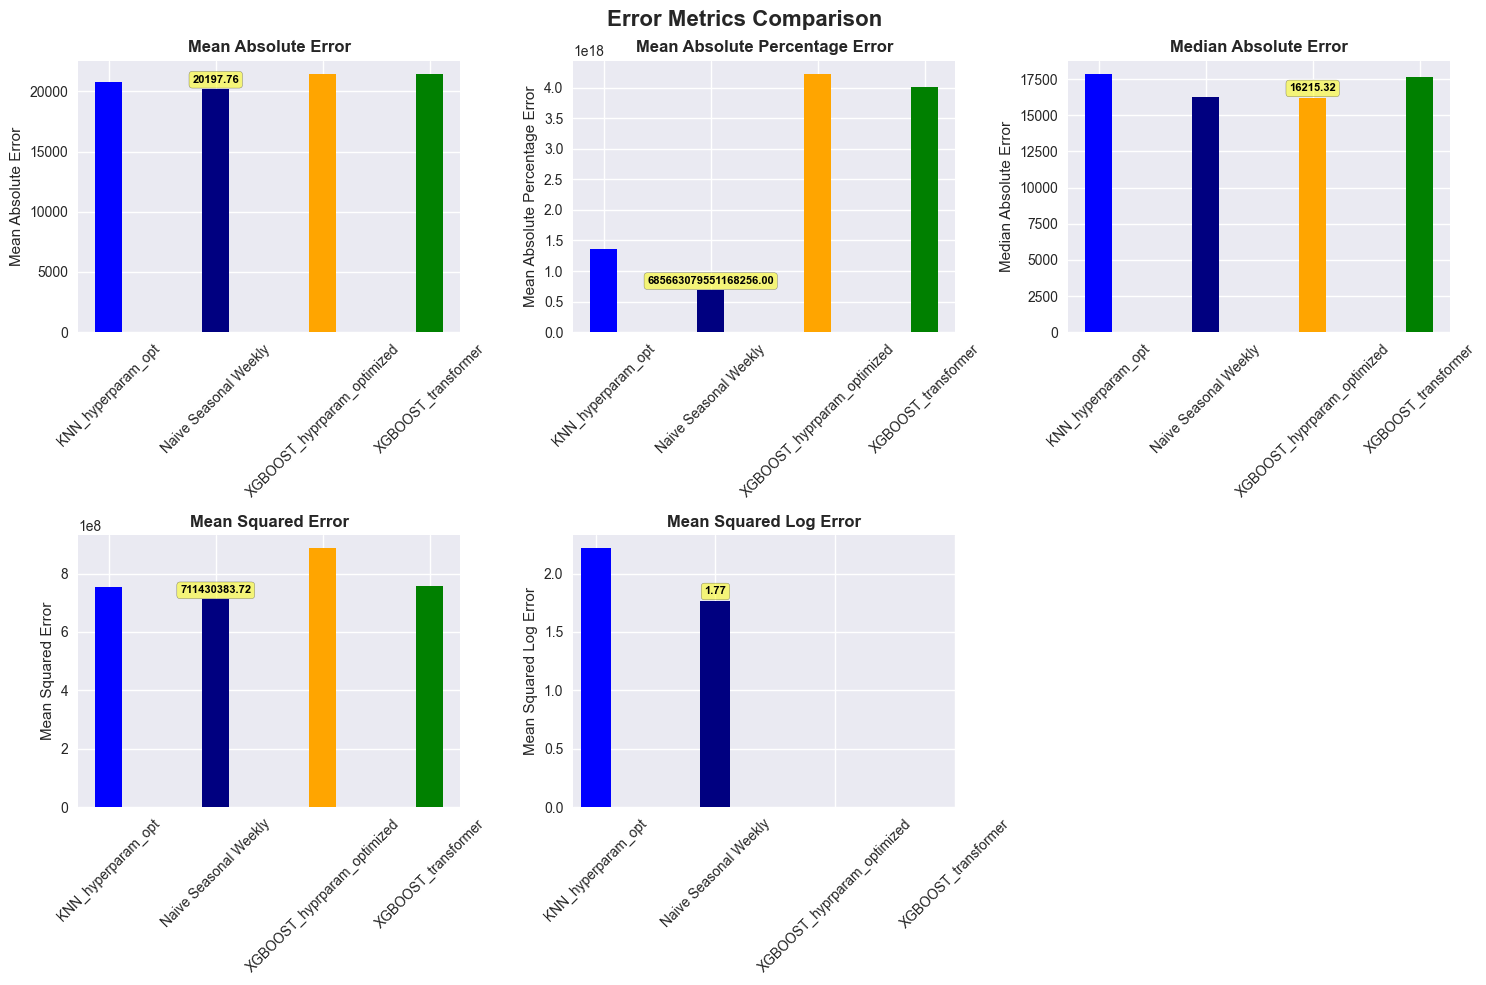

In [843]:
# Data for the error metrics
models = error_metrics['Model']
metrics = ['Mean Absolute Error', 'Mean Absolute Percentage Error', 'Median Absolute Error', 'Mean Squared Error', 'Mean Squared Log Error']
values = error_metrics[metrics].values
colors = ['blue', 'navy', 'orange','green']
# Set up the figure and axis
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

# Set bar width
barWidth = 0.25

# Create subplots for each error metric
for i, metric in enumerate(metrics):
    row = i // 3
    col = i % 3
    ax = axs[row, col]
    for j, model in enumerate(models):
        color = 'blue' if j == 0 else 'navy' if j == 1 else 'orange' if j == 2 else 'green'
        ax.bar(j, values[j][i], color=color, label=model, width=barWidth)
        ax.set_title(models[j])

    ax.set_ylabel(metric)
    ax.set_xticks(range(len(models)))
    ax.set_xticklabels(models, rotation=45)
    ax.set_title(metric, fontsize=12, fontweight='bold')  # Set the title to the error metric column name
    # Annotate the bar with the smallest error value
    min_idx = error_metrics[metric].idxmin()
    ax.annotate(f'{error_metrics[metric][min_idx]:.2f}',
                xy=(min_idx, error_metrics[metric][min_idx]),
                xytext=(0, 3),  # 3 points vertical offset
                textcoords='offset points',
                ha='center', va='bottom',
                fontsize=8, fontweight='bold',
                color='black',
                bbox=dict(boxstyle='round,pad=0.3', fc='yellow', alpha=0.5))
    

# Remove the subplot in row 2, column 3
fig.delaxes(axs[1, 2])
# Set the suptitle for the entire figure
plt.suptitle('Error Metrics Comparison', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

We can see that booseter with hyperparameter optimization and seasonality used transformed method worked better than the shallow hyper parameter optimization. I think these models are not appropriate for forecasting the online store sales in our case and are not appropriate for our case. as the errors are not acceptable. I didn't take into account all the temporal features I added in preprocessing. I also observed that When I introduced seasonality of weekly and bi-weekly the model improved a lot for even the simplest naive model. I want to evaluate other models and compare them with our three models. For now I am going to get out of sample prediction for the next three months as we don't have enough time to find the most optimized solution.
For now, i would say we should use a simple mode and seasonality has great impact one our model as even simplest model has better performance than our booster model. I think prophet would be better solution for this dataset and the best would be combination of SARIMA and xboost.

##### Future out of sample prediction

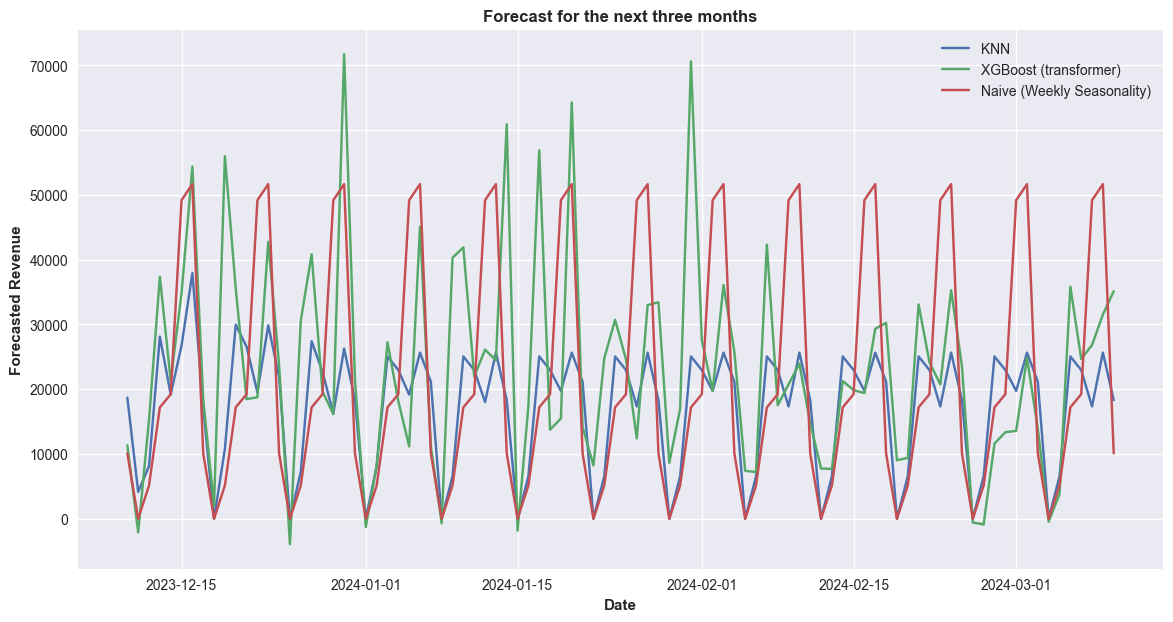

In [844]:
date_rng = pd.date_range(start='2023-12-10', end='2024-03-10', freq='D')
X_future = pd.DataFrame(date_rng, columns=['date'])
X_future['date'] = pd.to_datetime(X_future['date'])
X_future.set_index('date', inplace=True)
# Calculate the forecast horizon based on the length of X_future
fh = np.arange(1, len(X_future) + 1)
# Get future predictions for each model
forecast_knn_weekly=forecaster_knn_opt.predict(fh)
forecast_xgb_transformer = gscv.predict(fh)
forecast_naive_seasonal_weekly = forecaster_naive.predict(fh)

# Plot the forecasts for all models in one plot
plt.figure(figsize=(14, 7))
plt.plot(X_future.index, forecast_knn_weekly, label='KNN')
plt.plot(X_future.index, forecast_xgb_transformer, label='XGBoost (transformer)')
plt.plot(X_future.index, forecast_naive_seasonal_weekly, label='Naive (Weekly Seasonality)')
plt.title('Forecast for the next three months', fontweight='bold')
plt.xlabel('Date', fontweight='bold')
plt.ylabel('Forecasted Revenue', fontweight='bold')
plt.legend()
plt.show()